In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

csv_data_raw = pd.read_csv('final_merged_data.csv')

In [19]:
csv_data_raw.isna().sum()

csv_data_raw = csv_data_raw.dropna()
csv_data_raw.isna().sum()

Company Name_x               0
TICKER                       0
Quarter                      0
Price                        0
Total Ret                    0
Price Ret Ex-Dividend        0
Weighted Mkt Return          0
Volume                       0
Dividend                     0
Price Low                    0
Price High                   0
Shares Outstanding           0
Excess Return                0
Mkt Cap                      0
Price Growth Rate            0
Quart Rev                    0
Quart NI                     0
Equity                       0
Liabilities                  0
Revenue                      0
Industry Code                0
Asset                        0
Current Asset                0
EPS                          0
Rating                       0
Revenue Growth               0
Earnings Growth Rate         0
P/E Ratio Annual             0
P/E Ratio Quarter            0
Mean Recommendation          0
Median Recommendation        0
Recommendation StdDev        0
Number o

In [20]:
csv_data_raw.head(10)

,Company Name_x,TICKER,Quarter,Price,Total Ret,Price Ret Ex-Dividend,Weighted Mkt Return,Volume,Dividend,Price Low,...,P/E Ratio Quarter,Mean Recommendation,Median Recommendation,Recommendation StdDev,Number of Recommendations,Number of Upgrades,Number of Downgrades,Buy Percentage,Sell Percentage,Hold Percentage
0,AMERICAN AIRLINES GROUP INC,AAL,2014Q2,39.396667,0.173056,0.057685,0.016600,7852461.0,0.0,35.07,...,32.882202,1.940000,2.0,0.733333,49,1,0,77.573333,0.000000,22.426667
1,AMERICAN AIRLINES GROUP INC,AAL,2014Q3,37.737000,-0.180017,-0.060781,-0.001849,6449143.0,0.1,35.48,...,28.809702,1.883333,2.0,0.693333,52,0,0,82.676667,0.000000,17.323333
2,AMERICAN AIRLINES GROUP INC,AAL,2014Q4,47.836667,0.446994,0.148058,0.012870,10121212.0,0.1,41.35,...,56.944677,1.833333,2.0,0.643333,54,2,0,87.033333,0.000000,12.966667
3,AMERICAN AIRLINES GROUP INC,AAL,2015Q1,49.920000,-0.004967,-0.002335,0.006118,7988790.0,0.1,47.90,...,37.277992,1.776667,2.0,0.643333,54,0,2,88.886667,0.000000,11.113333
4,AMERICAN AIRLINES GROUP INC,AAL,2015Q2,43.530000,-0.263242,-0.088379,-0.000063,7058747.0,0.1,39.93,...,17.574531,2.006667,2.0,0.753333,51,0,3,72.250000,0.000000,27.750000
5,AMERICAN AIRLINES GROUP INC,AAL,2015Q3,39.303333,-0.025152,-0.009215,-0.027191,6966704.0,0.1,38.80,...,15.351051,2.230000,2.0,0.763333,48,1,1,58.333333,0.000000,41.666667
6,AMERICAN AIRLINES GROUP INC,AAL,2015Q4,43.276667,0.111586,0.036474,0.018044,5420601.0,0.1,41.26,...,8.288974,2.340000,3.0,0.826667,44,0,2,45.400000,0.000000,54.600000
7,AMERICAN AIRLINES GROUP INC,AAL,2016Q1,40.333333,-0.024979,-0.009181,0.004675,5852735.0,0.1,38.98,...,34.826835,2.136667,2.0,0.753333,43,3,0,65.396667,0.000000,34.603333
8,AMERICAN AIRLINES GROUP INC,AAL,2016Q2,31.636667,-0.344182,-0.115688,0.009668,6854349.0,0.1,28.30,...,18.798674,2.110000,2.0,0.756667,45,2,2,71.110000,2.223333,26.666667
9,AMERICAN AIRLINES GROUP INC,AAL,2016Q3,36.136667,0.287866,0.095016,0.014876,5923082.0,0.1,35.50,...,25.807023,2.273333,2.0,1.010000,40,1,2,65.200000,15.016667,19.776667


Select Features

In [ ]:
# Define features
NUMERIC_FEATURES = [
     'Price Growth Rate',
     'Revenue Growth',
     'P/E Ratio Annual',
     'P/E Ratio Quarter',
     'Mean Recommendation',
     'Median Recommendation',
     'Recommendation StdDev',
     'Number of Recommendations',
     'Number of Upgrades',
     'Number of Downgrades',
     'Buy Percentage',
     'Sell Percentage',
     'Hold Percentage',
     'Mkt Cap',
     'Weighted Mkt Return',
    ]
ONE_HOT_FEATURES = ['Rating', 'Industry Code']

In [91]:
data = csv_data_raw
TARGET = 'Next Quarter Total Ret'
FEATURES = features = [col for col in data.columns if col not in ['TICKER', 'Company Name_x', 'Quarter', TARGET]]
data = data.sort_values(by=['TICKER', 'Quarter']).reset_index(drop=True)
data[TARGET] = data.groupby('TICKER')['Excess Return'].shift(-1)
  

# SICCD to Industry Mapping (Short Names)
siccd_mapping = {
    range(100, 1000): "Agriculture",
    range(1000, 1500): "Mining",
    range(1500, 1800): "Construction",
    range(2000, 4000): "Manufacturing",
    range(4000, 5000): "Transport",
    range(5000, 6000): "Retail",
    range(6000, 6800): "Finance",
    range(7000, 9000): "Services",
    range(9100, 10000): "Public",
}
def map_sic_to_industry(sic_code):
    for key, value in siccd_mapping.items():
        if sic_code in key:
            return value
    return "Others"

# Map Industry
data['Real Industry'] = data['Industry Code'].apply(map_sic_to_industry)

# Transfer the value
data[NUMERIC_FEATURES] = data[NUMERIC_FEATURES].apply(pd.to_numeric, errors='coerce')
# 
# One-Hot 
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' 避免多重共线性
encoded_features = encoder.fit_transform(data[['Rating', 'Real Industry']])

# Encode one hot data
encoded_columns = encoder.get_feature_names_out(['Rating', 'Real Industry'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=data.index)
data = pd.concat([data.drop(['Rating', 'Real Industry'], axis=1), encoded_df], axis=1)
data = data.dropna()

Light GBM Feature

In [92]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
one_hot_features = [col for col in data.columns if col.startswith('Rating_') or col.startswith('Real Industry')]

# FEATURES = NUMERIC_FEATURES + one_hot_features
FEATURES = NUMERIC_FEATURES
X = data[FEATURES]
X.loc[:, NUMERIC_FEATURES] = X[NUMERIC_FEATURES].fillna(X[NUMERIC_FEATURES].mean())
# X.loc[:, one_hot_features] = X[one_hot_features].fillna(0)

y = data['Next Quarter Total Ret'].fillna(0)

In [93]:
# Split time data
split_date = '2022-01-01'

# Split Data
train_data = data[data['Quarter'] < split_date]
test_data = data[data['Quarter'] >= split_date]
X_train = train_data[FEATURES]
y_train = train_data[TARGET]

X_test = test_data[FEATURES]
y_test = test_data[TARGET]
scaler = StandardScaler()

# Split time data
split_date = '2022-01-01'  # Split data
train_data = data[data['Quarter'] < split_date]
test_data = data[data['Quarter'] >= split_date]
X_train = train_data[FEATURES]
y_train = train_data[TARGET]

X_test = test_data[FEATURES]
y_test = test_data[TARGET]
scaler = StandardScaler()

numeric_only_features = X_train[NUMERIC_FEATURES].select_dtypes(include=['float64', 'int64']).columns
X_train = X_train.copy() 
X_test = X_test.copy()

# replace invalid data
X_train[numeric_only_features] = X_train[numeric_only_features].replace([np.inf, -np.inf], np.nan)
X_test[numeric_only_features] = X_test[numeric_only_features].replace([np.inf, -np.inf], np.nan)

X_train[numeric_only_features] = X_train[numeric_only_features].fillna(X_train[numeric_only_features].mean())
X_test[numeric_only_features] = X_test[numeric_only_features].fillna(X_train[numeric_only_features].mean())

# standardlization
X_train[numeric_only_features] = scaler.fit_transform(X_train[numeric_only_features])
X_test[numeric_only_features] = scaler.transform(X_test[numeric_only_features])


检查是否有 inf 值:
Price Growth Rate             0
Revenue Growth               14
P/E Ratio Annual              2
P/E Ratio Quarter             2
Mean Recommendation           0
Median Recommendation         0
Recommendation StdDev         0
Number of Recommendations     0
Number of Upgrades            0
Number of Downgrades          0
Buy Percentage                0
Sell Percentage               0
Hold Percentage               0
Mkt Cap                       0
Weighted Mkt Return           0
dtype: int64

检查是否有 NaN 值:
Price Growth Rate            0
Revenue Growth               0
P/E Ratio Annual             0
P/E Ratio Quarter            0
Mean Recommendation          0
Median Recommendation        0
Recommendation StdDev        0
Number of Recommendations    0
Number of Upgrades           0
Number of Downgrades         0
Buy Percentage               0
Sell Percentage              0
Hold Percentage              0
Mkt Cap                      0
Weighted Mkt Return          0
dtype: int64


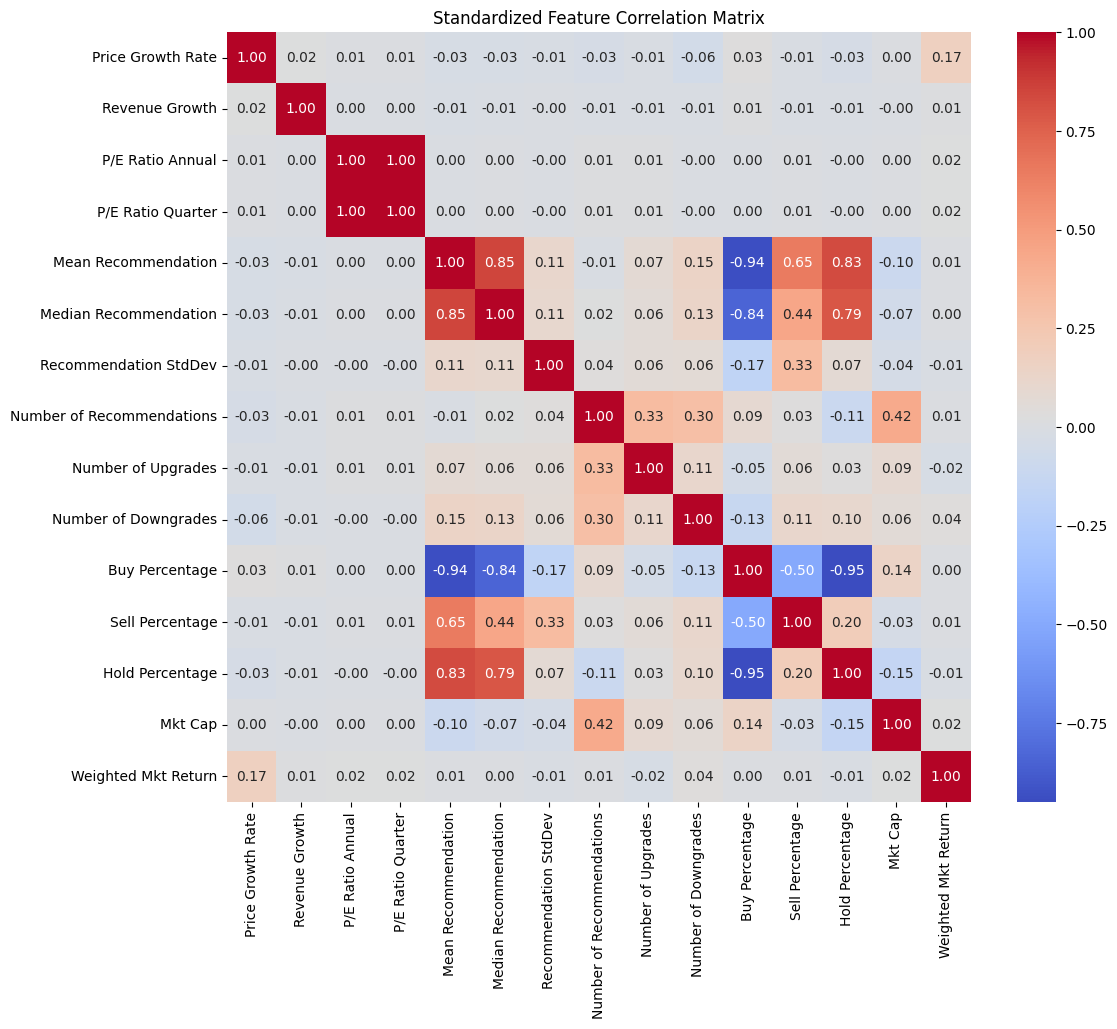

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = X_train.corr()
# Visualize Correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Standardized Feature Correlation Matrix")
plt.show()

In [103]:
# Merge high correlation features
correlation_threshold = 0.6
high_correlation_pairs = [
    (feature1, feature2)
    for feature1 in correlation_matrix.columns
    for feature2 in correlation_matrix.index
    if feature1 != feature2 and abs(correlation_matrix.loc[feature1, feature2]) > correlation_threshold
]

print(f"High Correlated Feature Pairs (Correlation > {correlation_threshold}):")
print(high_correlation_pairs)

for feature1, feature2 in high_correlation_pairs:
    if feature1 not in X_train.columns or feature2 not in X_train.columns:
        print(f"Skipping missing features: {feature1}, {feature2}")
        continue
    merged_feature_name = f"{feature1}_{feature2}_merged"
    X_train[merged_feature_name] = (X_train[feature1] + X_train[feature2]) / 2
    X_test[merged_feature_name] = (X_test[feature1] + X_test[feature2]) / 2
    X_train.drop([feature1, feature2], axis=1, inplace=True)
    X_test.drop([feature1, feature2], axis=1, inplace=True)


High Correlated Feature Pairs (Correlation > 0.6):
[('P/E Ratio Annual', 'P/E Ratio Quarter'), ('P/E Ratio Quarter', 'P/E Ratio Annual'), ('Mean Recommendation', 'Median Recommendation'), ('Mean Recommendation', 'Buy Percentage'), ('Mean Recommendation', 'Sell Percentage'), ('Mean Recommendation', 'Hold Percentage'), ('Median Recommendation', 'Mean Recommendation'), ('Median Recommendation', 'Buy Percentage'), ('Median Recommendation', 'Hold Percentage'), ('Buy Percentage', 'Mean Recommendation'), ('Buy Percentage', 'Median Recommendation'), ('Buy Percentage', 'Hold Percentage'), ('Sell Percentage', 'Mean Recommendation'), ('Hold Percentage', 'Mean Recommendation'), ('Hold Percentage', 'Median Recommendation'), ('Hold Percentage', 'Buy Percentage')]
Skipping missing features: P/E Ratio Annual, P/E Ratio Quarter
Skipping missing features: P/E Ratio Quarter, P/E Ratio Annual
Skipping missing features: Mean Recommendation, Buy Percentage
Skipping missing features: Mean Recommendation, Sel

In [104]:
# Create lightGBM correlation
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM params
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1
}

# train model
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=[lgb_train, lgb_test], 
    valid_names=['train', 'valid'], 
)

# Predict
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.05
R^2 Score: -0.10


In [105]:
feature_importances = model.feature_importance(importance_type='gain')
feature_names = X_train.columns

# Create Feature importance ranking
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

                                             Feature  Importance
8                                Weighted Mkt Return  384.449735
1                                     Revenue Growth  215.435172
7                                            Mkt Cap  195.918389
0                                  Price Growth Rate  195.294579
9          P/E Ratio Annual_P/E Ratio Quarter_merged  189.039920
10  Mean Recommendation_Median Recommendation_merged  131.953995
3                          Number of Recommendations  126.015900
2                              Recommendation StdDev  119.269990
11             Buy Percentage_Hold Percentage_merged  106.572653
6                                    Sell Percentage   39.135361
5                               Number of Downgrades   21.834924
4                                 Number of Upgrades   20.726127
